# Motion Capture Data Analysis - NM17

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [239]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa #Sound analysis

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [240]:
!{sys.executable} -m pip install chart_studio  #Librosa plots

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [253]:
!{sys.executable} -m pip install numba

  Using cached https://files.pythonhosted.org/packages/ac/7d/e01bcbf4a35cbb07ce04aaa545030bde231331aaabe7c44726b099f8fd86/numba-0.49.1-cp36-cp36m-macosx_10_14_x86_64.whl
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [254]:
import numba

In [255]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio

%load_ext rpy2.ipython

#r packages
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
stats = importr('stats')
base = importr('base')

from scipy import stats
import seaborn
from IPython.display import display, Markdown


ImportError: cannot import name 'cached_property'

## Reading Motion Capture Data into Pandas Dataframes

In [151]:
#Reading QTOM generated tsv files (one for each group of participants) from local drive

nm17raw = {}

path = r'/Users/vesanche/Desktop/NM17_ex1/2020exports/' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.tsv")))

i=1

for filename in nm_files:
    nm17raw[i] = pd.read_csv(filename, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    nm17raw[i].drop(nm17raw[i].columns[len(nm17raw[i].columns)-10:len(nm17raw[i].columns)], axis=1, inplace=True)
    #nm17raw[i].drop(nm17raw[i].iloc[:, 0:6],  axis = 1, inplace = True)
    i = i+1



In [153]:
#Example: Group1. All participants.
nm17raw[1]


,P01 X,P01 Y,P01 Z,P03 X,P03 Y,P03 Z,P10 X,P10 Y,P10 Z,P11 X,P11 Y,P11 Z,P12 X,P12 Y,P12 Z
0,797.440,1615.391,1741.077,725.214,-176.485,1544.417,-678.800,1016.819,1845.735,-676.639,167.570,1568.894,-664.057,-644.955,1671.752
1,797.551,1615.334,1741.073,725.236,-176.459,1544.410,-678.854,1016.878,1845.778,-676.722,167.580,1568.901,-663.989,-644.980,1671.759
2,797.688,1615.305,1741.069,725.253,-176.444,1544.410,-678.872,1016.835,1845.749,-676.802,167.558,1568.914,-663.911,-644.959,1671.743
3,797.800,1615.244,1741.071,725.258,-176.422,1544.402,-678.913,1016.866,1845.779,-676.876,167.542,1568.903,-663.872,-644.996,1671.728
4,797.933,1615.188,1741.077,725.266,-176.409,1544.421,-678.934,1016.851,1845.775,-676.946,167.526,1568.900,-663.829,-644.966,1671.725
5,798.047,1615.128,1741.074,725.276,-176.394,1544.396,-678.992,1016.866,1845.784,-677.025,167.507,1568.905,-663.776,-644.976,1671.712
6,797.909,1614.781,1740.953,725.186,-176.381,1544.351,-678.946,1016.880,1845.895,-676.952,167.499,1568.865,-663.621,-644.630,1671.583
7,798.021,1614.714,1740.938,725.194,-176.361,1544.357,-678.981,1016.870,1845.893,-677.001,167.485,1568.859,-663.555,-644.647,1671.568
8,798.144,1614.669,1740.932,725.196,-176.351,1544.350,-679.018,1016.878,1845.896,-677.145,167.555,1568.820,-663.492,-644.631,1671.583
9,798.241,1614.601,1740.928,725.224,-176.291,1544.367,-679.061,1016.881,1845.913,-677.199,167.537,1568.834,-663.462,-644.666,1671.564


## Extracting individuals from groups and nesting in dictionaries

In [154]:
nm17 = {}
Fs = 200 #sampling frequency of the Mocap system (fps)    
num_groups = len(nm17raw)
    

for g_id in range(1,num_groups+1):
    nm17[g_id] = {}
    j = 0
    k = 0
    for i in range (3,len(nm17raw[g_id].columns)+3,3):
        j = j+1
        nm17[g_id][j] = nm17raw[g_id].iloc[:,k:i:1]
        nm17[g_id][j].columns = ['X', 'Y', 'Z']
        time = np.linspace(0, len(nm17raw[g_id])/Fs, len(nm17raw[g_id]))
        nm17[g_id][j].insert(0, 'Time (s)', time)
        k = k+3

In [156]:
nm17[1][1] #data from group 1, participant 1 with time column

,Time (s),X,Y,Z
0,0.000000,-664.057,-644.955,1671.752
1,0.005000,-663.989,-644.980,1671.759
2,0.010000,-663.911,-644.959,1671.743
3,0.015000,-663.872,-644.996,1671.728
4,0.020000,-663.829,-644.966,1671.725
5,0.025000,-663.776,-644.976,1671.712
6,0.030000,-663.621,-644.630,1671.583
7,0.035000,-663.555,-644.647,1671.568
8,0.040001,-663.492,-644.631,1671.583
9,0.045001,-663.462,-644.666,1671.564


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [80]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (s)'][1:]
    
    return displacement


In [81]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm17[groups]) + 1):
        displacements[groups][i] = displacement(nm17[groups][i])
        displacements[groups][i]['timestep (s)'] = displacements[groups][i]['Time (s)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (s)'], axis=1)
        

In [82]:
displacements[1][1] #displacement for group 1, participant 1

,X,Y,Z,timestep (s)
Time (s),,,,
0.005000,0.111,-0.057,-0.004,0.005
0.010000,0.137,-0.029,-0.004,0.005
0.015000,0.112,-0.061,0.002,0.005
0.020000,0.133,-0.056,0.006,0.005
0.025000,0.114,-0.060,-0.003,0.005
0.030000,-0.138,-0.347,-0.121,0.005
0.035000,0.112,-0.067,-0.015,0.005
0.040001,0.123,-0.045,-0.006,0.005
0.045001,0.097,-0.068,-0.004,0.005


### Plotting displacement


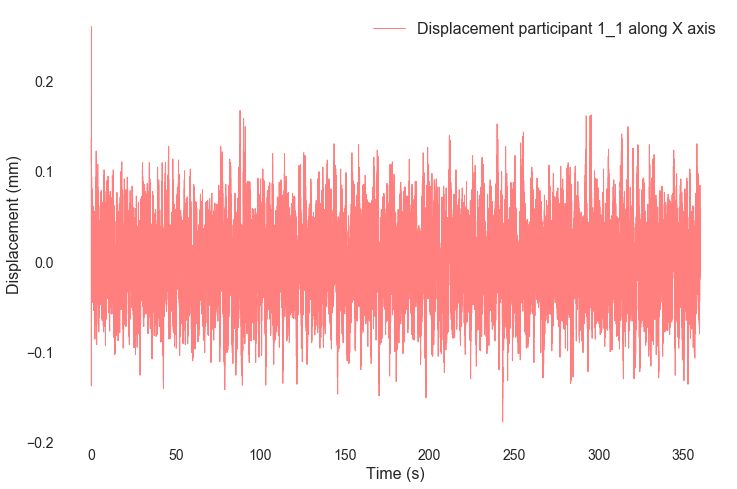

In [157]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[1][1]['X'], lw=1, label='Displacement participant 1_1 along X axis', color='red', alpha=0.5) #Displacement on x axis

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (mm)', fontsize=16);

### Calculating norm of displacement

In [104]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [158]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm17[groups])+1):
        disp_norms[groups][i] = disp_norm(displacements[groups][i])

In [160]:
disp_norms[1][1]

,Norm of Displacement
Time (s),
0.005000,0.124844
0.010000,0.140093
0.015000,0.127550
0.020000,0.144433
0.025000,0.128860
0.030000,0.392548
0.035000,0.131370
0.040001,0.131111
0.045001,0.118528


### Distance travelled
Cummulative distance travelled

In [161]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
   
    

In [162]:
disp_norms_group[1]

,1,2,3,4,5
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (s),,,,,
0.005000,0.124844,0.034771,0.090807,0.083893,0.072787
0.010000,0.140093,0.022672,0.054900,0.083982,0.082347
0.015000,0.127550,0.023937,0.059515,0.076505,0.055812
0.020000,0.144433,0.024372,0.026115,0.071868,0.052517
0.025000,0.128860,0.030822,0.060581,0.081406,0.055480
0.030000,0.392548,0.101459,0.120967,0.083624,0.400477
0.035000,0.131370,0.022361,0.036455,0.051313,0.069785
0.040001,0.131111,0.012369,0.037974,0.164794,0.066708


Text(0.5, 1.0, 'Distance travelled for all participants, Group 1')

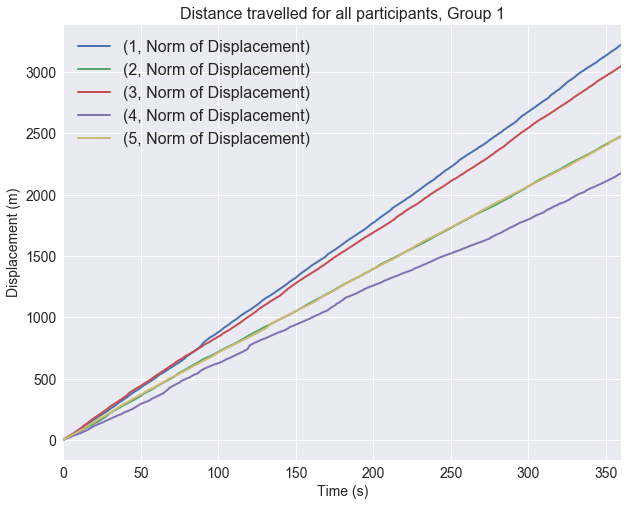

In [163]:
disp_norms_group[1].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (mm)', fontsize=14);
plt.legend(loc='upper left', fontsize=16)
plt.title('Distance travelled for all participants, Group 1', fontsize=16)

### Plotting the planar displacement

(array([-652., -650., -648., -646., -644., -642., -640., -638., -636.,
        -634., -632.]), <a list of 11 Text yticklabel objects>)

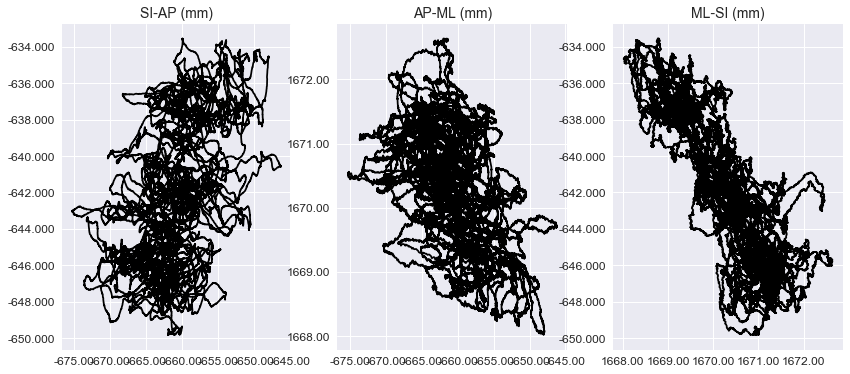

In [164]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm17[1][5]['X'], nm17[1][5]['Y'], color='k') #XY plane participant 5, group 1
plt.title('X-Y (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ab = plt.subplot(1, 3, 2)
plt.plot(nm17[1][5]['X'], nm17[1][5]['Z'], color='k') #XZ plane participant 5, group 1
plt.title('X-Z (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ac = plt.subplot(1, 3, 3)
plt.plot(nm17[1][5]['Z'], nm17[1][5]['Y'], color='k') #ZY plane participant 5, group 1
plt.title('Z-Y (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [165]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [166]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [167]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [183]:

velx = {} #anteriorposterior (AP)
vely = {} #mediolateral (ML)
velz = {} #vertical (SI)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm17[groups])+1):
        velx[groups][i] = x_vel(displacements[groups][i])
        vely[groups][i] = y_vel(displacements[groups][i])
        velz[groups][i] = z_vel(displacements[groups][i])

In [172]:
velx[1][2] #velocity in the AP direction for participant 1_2

,Vel X
Time (s),
0.005000,4.399939
0.010000,3.399953
0.015000,0.999986
0.020000,1.599978
0.025000,1.999972
0.030000,17.999750
0.035000,1.599978
0.040001,0.399994
0.045001,5.599922


### Calculating norm of velocity (QoM)

In [184]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [185]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm17[groups])+1):
        velocities[groups][i] = velocity_norm(displacements[groups][i])

In [180]:
velocities[1][5] #displaying velocity for group 1, participant 5

,Velocity
Time (s),
0.005000,14.557270
0.010000,16.469137
0.015000,11.162282
0.020000,10.503187
0.025000,11.095791
0.030000,80.094331
0.035000,13.956883
0.040001,13.341479
0.045001,9.971822


In [186]:
#Concatenating velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [187]:
vels_group[1] #QoM

,1,2,3,4,5
Time (s),,,,,
0.005000,24.968434,6.954039,18.161245,16.778325,14.557270
0.010000,28.018176,4.534251,10.979829,16.796195,16.469137
0.015000,25.509644,4.787417,11.902775,15.300768,11.162282
0.020000,28.886274,4.874355,5.222953,14.373387,10.503187
0.025000,25.771720,6.164328,12.115937,16.281051,11.095791
0.030000,78.508527,20.291588,24.193052,16.724600,80.094331
0.035000,26.273577,4.472074,7.290989,10.262411,13.956883
0.040001,26.221764,2.473829,7.594630,32.958304,13.341479
0.045001,23.705366,13.671679,9.267018,11.723318,9.971822


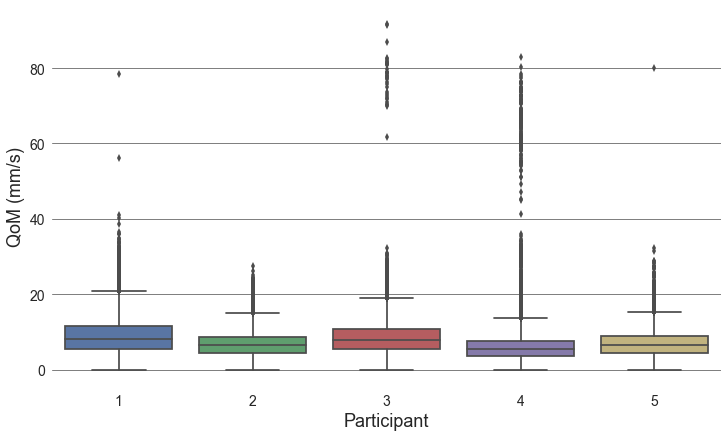

In [188]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[1], width=0.8) #Box plot for Group 1
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (mm/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [189]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm17[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [190]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [191]:
vel_envx_group[1] #smoothed velocities group 1

,1,2,3,4,5
Time (s),,,,,
0.005000,11.511840,3.839947,8.269885,5.293926,7.141901
0.010000,11.457267,3.821729,8.231569,5.289035,7.191979
0.015000,11.425332,3.790143,8.233219,5.274437,7.144999
0.020000,11.401783,3.764996,8.207653,5.275655,7.131940
0.025000,11.382534,3.765332,8.238347,5.255696,7.124901
0.030000,11.293176,3.750424,8.245600,5.253260,7.089425
0.035000,11.256447,3.792400,8.171585,5.220682,7.064053
0.040001,11.169938,3.799947,8.192410,5.231703,7.059715
0.045001,11.105401,3.777725,8.183220,5.235112,7.031384


Text(0.5, 1.0, 'Velocity (QoM) participant 1_5')

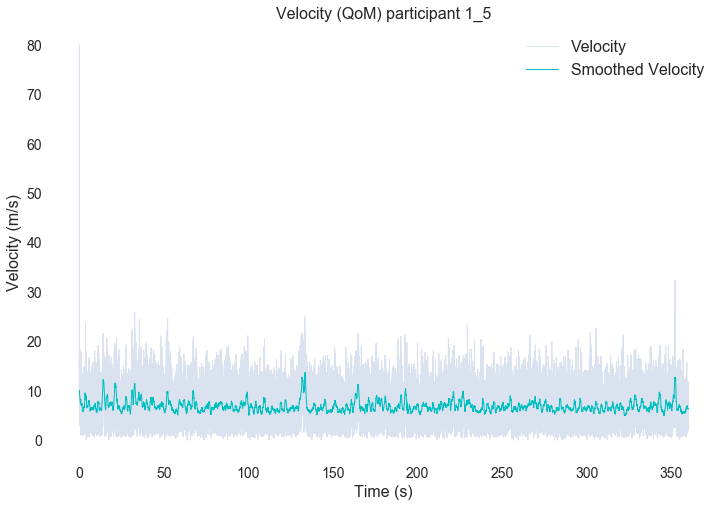

In [193]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[1][5], lw=1, label='QoM', alpha=0.2)
ax.plot(velenv[1][5], lw=1, label='Smoothed QoM', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (QoM) participant 1_5', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants in Group 1')

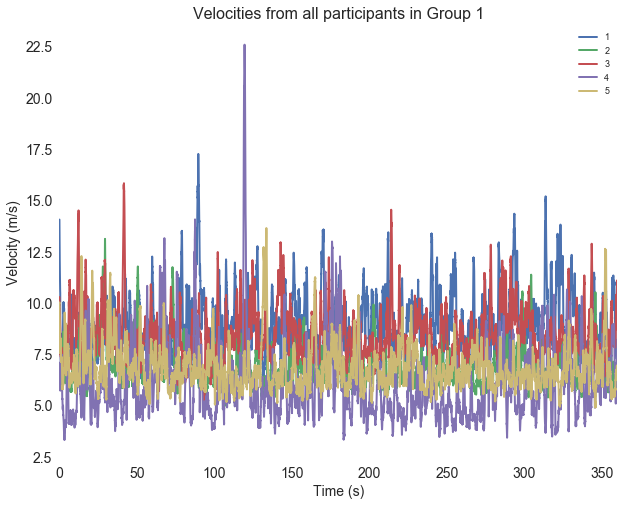

In [194]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[1].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants in Group 1', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [195]:
#Mean of cleaned velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm17[groups])+1):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Using the order of presentation of stimuli for each group to segment full trials into conditions (music-silence), and stimuli

In [197]:
#Stimuli presentation order.
nm17songorder = pd.read_csv('/Users/vesanche/Desktop/IMV UiO/NM/2017 NM/nm17songorder.csv') #read the stimuli order file
nm17songorder.columns = ['Group','1', '2', '3']
nm17songorder.set_index('Group',inplace=True, drop=True) #Displaying song order table
nm17songorder

,1,2,3
Group,,,
A,2,1,3
B,3,1,2
C,3,2,1
D,1,2,3
E,2,3,1
F,3,2,1
G,1,3,2
H,2,1,3
I,1,3,2


### Segmenting group data based on the order and duration of stimuli

In [201]:
def segments(songorder,data):
    #Silence 1 - 30s
    #Silence 2, 3 - 60s
    #1 - Telespringar - 60s
    #2 - EDM - 60s
    #3 - Indian - 60s
    #Silence 4 - 30s
    #Total duration of recording 360s
   
    
    start = {}
    segments = {}
    segments[1] = data[0:30]
    start[1] = 0
    start[2] = 30
    song = 0
    stim_dur = 60
    
    while song <= len(songorder.columns)-2:
        for inicio in range (2,7,2):
            if songorder.iloc[0][song] == 1:
                        segments[inicio]=data[start[inicio]:start[inicio]+stim_dur] 
                        segments[inicio+1]=data[start[inicio]+stim_dur:start[inicio]+stim_dur+60] #60s silence
                        start[inicio+2] = start[inicio]+stim_dur+60
                        song = song+1  
            elif songorder.iloc[0][song] == 2:
                        segments[inicio]=data[start[inicio]:start[inicio]+stim_dur] 
                        segments[inicio+1]=data[start[inicio]+stim_dur:start[inicio]+stim_dur+60] #60s silence
                        start[inicio+2] = start[inicio]+stim_dur+60
                        song = song+1
            elif songorder.iloc[0][song] == 3:
                        segments[inicio]=data[start[inicio]:start[inicio]+stim_dur] 
                        segments[inicio+1]=data[start[inicio]+stim_dur:start[inicio]+stim_dur+60] #60s silence
                        start[inicio+2] = start[inicio]+stim_dur+60
                        song = song+1
            
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [202]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],vels_group[group_id])
    QoMX_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],velsx_group[group_id])
    QoMY_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(nm17songorder[group_id-1:group_id],vel_envz_group[group_id])

In [207]:
QoM_segmented[1][2] #Displaying QoM data for group 1, segment 2

,1,2,3,4,5,6,7,8
Time (s),,,,,,,,
330.004583,10.742290,7.113269,7.138528,19.345015,5.399925,8.316134,7.469836,8.404644
330.009583,8.740588,9.028717,1.766328,19.815880,9.046421,12.372378,5.789566,7.464479
330.014584,13.696525,11.001665,4.677541,20.168012,6.505292,5.899071,8.627742,5.083235
330.019584,9.568566,17.759258,2.505958,15.447763,8.747450,12.049729,5.134128,13.879288
330.024584,17.951909,6.770430,2.842495,24.742332,2.408285,8.518097,6.046403,3.394065
330.029584,10.704990,9.858869,1.414194,19.047045,7.626164,11.599839,6.968404,15.472341
330.034584,13.618915,5.203772,1.939045,15.064982,7.429567,13.654114,7.868817,1.886770
330.039584,9.046421,8.364093,2.340907,15.730007,7.496562,13.620384,9.709654,16.698271
330.044584,11.677166,13.392349,3.452487,13.243683,7.717405,9.771251,1.939045,4.617294


### Grouping data into Music and Silence conditions

In [209]:
#Odd segments are silence, even segments are music
QoM_segmented_mus = {} #creating empty dictionaries for music and silence
QoMX_segmented_mus = {}
QoMY_segmented_mus = {}
QoMZ_segmented_mus = {}

QoM_segmented_sil = {}
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mus = {}
QoMX_smooth_segmented_mus = {}
QoMY_smooth_segmented_mus = {}
QoMZ_smooth_segmented_mus = {}

QoM_smooth_segmented_sil = {}
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}


for group_id in range(1,num_groups+1):
  QoM_segmented_mus[group_id] = {} #creating empty dictionary for each group for both music and silence conditions
  QoMX_segmented_mus[group_id] = {}
  QoMY_segmented_mus[group_id] = {}
  QoMZ_segmented_mus[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mus[group_id] = {}
  QoMX_smooth_segmented_mus[group_id] = {}
  QoMY_smooth_segmented_mus[group_id] = {}
  QoMZ_smooth_segmented_mus[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  
  k = 0
  ksil=0
  
  for j in range (1,8,2):
    QoM_segmented_sil[group_id][ksil] = QoM_segmented[group_id][j] #filling each participant's dictionary with odd segments (silence)
    QoM_smooth_segmented_sil[group_id][ksil] = QoM_smooth_segmented[group_id][j]
    
    QoMX_segmented_sil[group_id][ksil] = QoMX_segmented[group_id][j] 
    QoMX_smooth_segmented_sil[group_id][ksil] = QoMX_smooth_segmented[group_id][j]
    QoMY_segmented_sil[group_id][ksil] = QoMY_segmented[group_id][j] 
    QoMY_smooth_segmented_sil[group_id][ksil] = QoMY_smooth_segmented[group_id][j]
    QoMZ_segmented_sil[group_id][ksil] = QoMZ_segmented[group_id][j] 
    QoMZ_smooth_segmented_sil[group_id][ksil] = QoMZ_smooth_segmented[group_id][j]
    
    ksil=ksil+1
  for i in range (1,7,2):  
    QoM_smooth_segmented_mus[group_id][k] = QoM_smooth_segmented[group_id][i+1]
    QoM_segmented_mus[group_id][k] = QoM_segmented[group_id][i+1] #filling each participant's dictionary with even segments (music)
     
    QoMX_smooth_segmented_mus[group_id][k] = QoMX_smooth_segmented[group_id][i+1]
    QoMX_segmented_mus[group_id][k] = QoMX_segmented[group_id][i+1] 
    QoMY_smooth_segmented_mus[group_id][k] = QoMY_smooth_segmented[group_id][i+1]
    QoMY_segmented_mus[group_id][k] = QoMY_segmented[group_id][i+1] 
    QoMZ_smooth_segmented_mus[group_id][k] = QoMZ_smooth_segmented[group_id][i+1]
    QoMZ_segmented_mus[group_id][k] = QoMZ_segmented[group_id][i+1] 
    k=k+1
    
    

In [213]:
QoM_segmented_mus[1][0] #Smoothed Group1 music segment0 (1st stimuli segment)

,1,2,3,4,5
Time (s),,,,,
30.000417,3.376342,4.673264,8.325748,7.045468,2.653263
30.005417,5.491736,6.232088,6.796964,8.199886,3.867762
30.010417,13.548243,8.527484,10.019841,7.840809,1.280607
30.015417,5.295207,3.224858,8.153414,5.617751,6.076099
30.020417,4.386282,5.003929,2.374835,7.249727,5.249689
30.025417,13.024411,6.936762,14.462164,7.769062,3.376342
30.030417,1.886770,7.467158,3.429238,5.477150,3.944562
30.035417,3.757607,3.714784,9.674575,6.794021,8.883570
30.040417,11.539337,6.514509,6.731920,7.845909,7.124506


### Mean QoM for each segment for each participant

In [214]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(1,len(QoM_segmented[qoms_group]) + 1):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())
       

In [216]:
Mean_QoM_segm[1][5] #Displaying mean QoM for participants in group 1, 5th segment (Silence 3)

1    8.938577
2    6.647966
3    8.345877
4    5.079588
5    6.867002
dtype: float64

### Sorting Music data by Stimuli

In [217]:
## Function to assign segments to stimuli based on the order of presentation for each group

def sort_stimuli(songorder,data):
   
    sorted_stimuli = {}
    song = 0
    while song <= len(songorder.columns)-1:
        
            if songorder.iloc[0][song] == 1:
                       sorted_stimuli[1] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 2:
                       sorted_stimuli[2] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 3:
                       sorted_stimuli[3] = data[song]
                       song = song+1
            
    return sorted_stimuli

In [218]:
## Running stimuli sorting function for full Music data from all groups
QoM_segmented_sort_mus = {}
QoMX_segmented_sort_mus = {}
QoMY_segmented_sort_mus = {}
QoMZ_segmented_sort_mus = {}

QoM_smooth_segmented_sort_mus = {}
QoMX_smooth_segmented_sort_mus = {}
QoMY_smooth_segmented_sort_mus = {}
QoMZ_smooth_segmented_sort_mus = {}


for group_id in range(1,num_groups+1):  
    QoM_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoM_segmented_mus[group_id])
    QoMX_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMX_segmented_mus[group_id])
    QoMY_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMY_segmented_mus[group_id])
    QoMZ_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMZ_segmented_mus[group_id])
    
    QoM_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoM_smooth_segmented_mus[group_id])
    QoMX_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMX_smooth_segmented_mus[group_id])
    QoMY_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMY_smooth_segmented_mus[group_id])
    QoMZ_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm17songorder[group_id-1:group_id],QoMZ_smooth_segmented_mus[group_id])
    
    
    

In [222]:
QoM_smooth_segmented_sort_mus[2][3][2] #Sorted stimuli: smooth QoM data for Group 2, Stimuli 3, Participant 2

Time (s)
270.003750     8.669697
270.008750     8.758556
270.013750     8.835091
270.018750     8.919675
270.023750     8.979205
270.028750     9.078700
270.033750     9.176697
270.038751     9.271615
270.043751     9.348912
270.048751     9.432597
270.053751     9.532432
270.058751     9.622942
270.063751     9.709319
270.068751     9.797973
270.073751     9.881962
270.078751     9.966376
270.083751    10.047690
270.088751    10.109142
270.093751    10.202219
270.098751    10.266906
270.103751    10.341277
270.108752    10.396758
270.113752    10.447490
270.118752    10.502413
270.123752    10.546929
270.128752    10.617495
270.133752    10.657916
270.138752    10.694147
270.143752    10.730775
270.148752    10.755179
                ...    
329.854581     6.716671
329.859581     6.708282
329.864581     6.714415
329.869582     6.716312
329.874582     6.744134
329.879582     6.734403
329.884582     6.699863
329.889582     6.747933
329.894582     6.722433
329.899582     6.742771
329.904

## Plotting segmented QoM

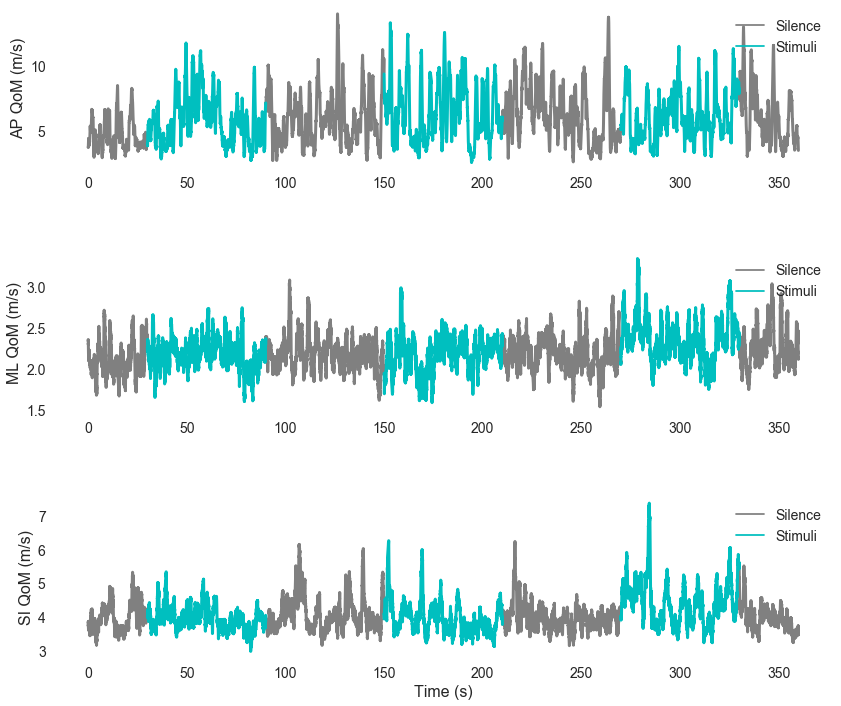

In [224]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}


axX = plt.subplot(3, 1, 1)
axX.set_facecolor("white")
for i in range(0,4,1):
  axX.plot(QoMX_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,3,1):
  axX.plot(QoMX_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
axZ.set_facecolor("white")
for i in range(0,4,1):
  axZ.plot(QoMY_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,3,1):
  axZ.plot(QoMY_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
axY.set_facecolor("white")
for i in range(0,4,1):
  axY.plot(QoMZ_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,3,1):
  axY.plot(QoMZ_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


plt.subplots_adjust(hspace=0.5)



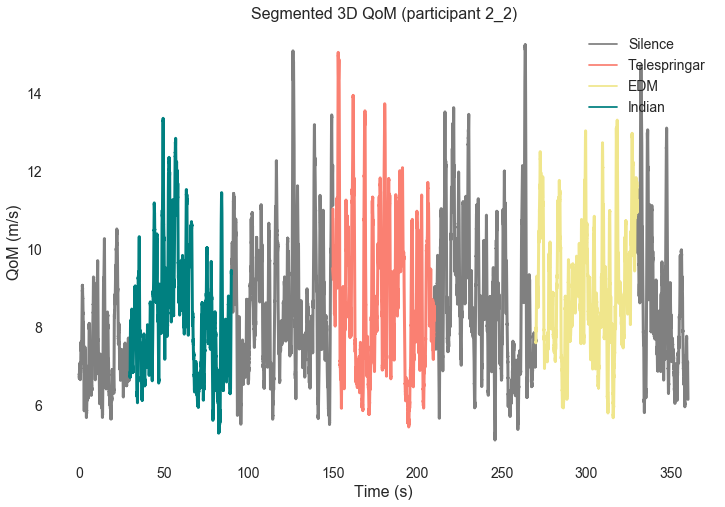

In [225]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
ax8.set_facecolor("white")
for i in range(0,4,1):
  ax8.plot(QoM_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_sort_mus[2][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Telespringar", color='salmon')
plt.plot([], label="EDM", color='khaki')
plt.plot([], label="Indian", color='teal')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 2_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

## Visualizing the stimuli

In [116]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files with librosa

y1, sr1 = librosa.load('path_tele')
y2, sr2 = librosa.load('path_edm')
y3, sr3 = librosa.load('path_indian')


fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[12:19,0:2])
librosa.display.waveplot(y1, sr=sr1, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:19,2:4])
librosa.display.waveplot(y2, sr=sr2, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:19,4:6])
librosa.display.waveplot(y3, sr=sr3, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


ax8 = plt.subplot(grid[0:10,0:6])

for i in range(0,4,1):
  ax8.plot(QoM_smooth_segmented_sil[5][i][2], 'gray', lw=3, label='_nolegend_') #plotting silences - group 5_participant 2

ax8.plot(QoM_smooth_segmented_sort_mus[5][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[5][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[5][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Telespringar", color='salmon')
plt.plot([], label="EDM", color='khaki')
plt.plot([], label="Indian", color='teal')


plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.title('Segmented QoM (participant 5_2)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)
plt.legend(loc='upper left', fontsize=14, ncol=2)
plt.tight_layout()
fig.savefig("segmentsqom_stimuli.pdf", bbox_inches='tight')


NameError: name 'librosa' is not defined

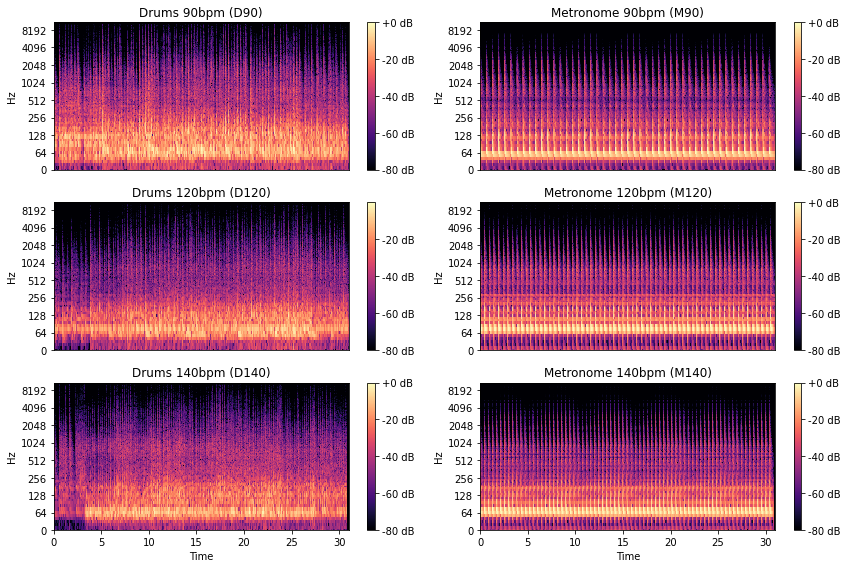

In [ ]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)


fig = plt.figure(figsize=(12,8))

plt.subplot(3, 1, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Telespringar')

plt.subplot(3, 1, 2)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('EDM')

plt.subplot(3, 1, 3)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Indian')


plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
